In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the CSV
data = pd.read_csv('/content/forbes_400_richest.csv',delimiter=',')
data


,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
0,Bernard Arnault oversees the LVMH empire of so...,1,176637.915,Bernard Arnault & family,Paris,LVMH,France,M,Arnault,176637.915245,3933.508385,158000.0,"['Arnault apparently wooed his wife, Helene Me...",NaN,Fashion & Retail
1,Elon Musk cofounded six companies including el...,2,146499.989,Elon Musk,Austin,"Tesla, SpaceX",United States,M,Musk,146499.988880,74761.496690,219000.0,"[""Musk, who says he's worried about population...",Texas,Automotive
2,Gautam Adani is chairman of the $21 billion (r...,3,121101.397,Gautam Adani,Ahmedabad,"infrastructure, commodities",India,M,Adani,116651.338959,-5777.789176,90000.0,"[""Adani owns Abbot Point, a controversial coal...",NaN,Diversified
3,Jeff Bezos founded e-commerce giant Amazon in ...,4,108524.509,Jeff Bezos,Medina,Amazon,United States,M,Bezos,108524.508500,23902.460000,171000.0,"[""Growing up, Jeff Bezos worked summers on his...",Washington,Technology
4,"Known as the ""Oracle of Omaha,"" Warren Buffett...",5,106348.208,Warren Buffett,Omaha,Berkshire Hathaway,United States,M,Buffett,106348.207791,934.000000,118000.0,"['Buffett still lives in the same Omaha, Nebra...",Nebraska,Finance & Investments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Fisher is executive chairman and co-chief inve...,396,6244.692,Ken Fisher,Dallas,money management,United States,M,Fisher,6244.692000,6244.692000,5300.0,['Fisher wrote an investing column in Forbes m...,Texas,Finance & Investments
396,María Asunción Aramburuzabala is by far México...,397,6241.294,Maria Asuncion Aramburuzabala & family,Mexico City,"beer, investments",Mexico,F,Aramburuzabala,6241.293681,6240.670118,6200.0,NaN,NaN,Food & Beverage
397,Investor Michal Solowow got his start in the ...,398,6224.107,Michal Solowow,Kielce,investments,Poland,M,Solowow,6224.107142,6210.714123,6200.0,"['A once avid race car driver, Solowow was a c...",NaN,Finance & Investments
398,"Jay Chaudhry is CEO of Zscaler, a cybersecurit...",399,6219.830,Jay Chaudhry,Reno,security software,United States,M,Chaudhry,6219.830080,91.600000,11400.0,"[""Chaudhry's first time on a plane was his fli...",Nevada,Technology


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bio                   400 non-null    object 
 1   rank                  400 non-null    int64  
 2   finalWorth            400 non-null    float64
 3   personName            400 non-null    object 
 4   city                  395 non-null    object 
 5   source                400 non-null    object 
 6   countryOfCitizenship  400 non-null    object 
 7   gender                393 non-null    object 
 8   lastName              400 non-null    object 
 9   estWorthPrev          400 non-null    float64
 10  privateAssetsWorth    399 non-null    float64
 11  archivedWorth         397 non-null    float64
 12  abouts                290 non-null    object 
 13  state                 214 non-null    object 
 14  industries            400 non-null    object 
dtypes: float64(4), int64(1)

# New Section

In [ ]:
data.head()

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
0,Bernard Arnault oversees the LVMH empire of so...,1,176637.915,Bernard Arnault & family,Paris,LVMH,France,M,Arnault,176637.915245,3933.508385,158000.0,"['Arnault apparently wooed his wife, Helene Me...",NaN,Fashion & Retail
1,Elon Musk cofounded six companies including el...,2,146499.989,Elon Musk,Austin,"Tesla, SpaceX",United States,M,Musk,146499.988880,74761.496690,219000.0,"[""Musk, who says he's worried about population...",Texas,Automotive
2,Gautam Adani is chairman of the $21 billion (r...,3,121101.397,Gautam Adani,Ahmedabad,"infrastructure, commodities",India,M,Adani,116651.338959,-5777.789176,90000.0,"[""Adani owns Abbot Point, a controversial coal...",NaN,Diversified
3,Jeff Bezos founded e-commerce giant Amazon in ...,4,108524.509,Jeff Bezos,Medina,Amazon,United States,M,Bezos,108524.508500,23902.460000,171000.0,"[""Growing up, Jeff Bezos worked summers on his...",Washington,Technology
4,"Known as the ""Oracle of Omaha,"" Warren Buffett...",5,106348.208,Warren Buffett,Omaha,Berkshire Hathaway,United States,M,Buffett,106348.207791,934.000000,118000.0,"['Buffett still lives in the same Omaha, Nebra...",Nebraska,Finance & Investments


In [ ]:
data.tail()

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
395,Fisher is executive chairman and co-chief inve...,396,6244.692,Ken Fisher,Dallas,money management,United States,M,Fisher,6244.692000,6244.692000,5300.0,['Fisher wrote an investing column in Forbes m...,Texas,Finance & Investments
396,María Asunción Aramburuzabala is by far México...,397,6241.294,Maria Asuncion Aramburuzabala & family,Mexico City,"beer, investments",Mexico,F,Aramburuzabala,6241.293681,6240.670118,6200.0,NaN,NaN,Food & Beverage
397,Investor Michal Solowow got his start in the ...,398,6224.107,Michal Solowow,Kielce,investments,Poland,M,Solowow,6224.107142,6210.714123,6200.0,"['A once avid race car driver, Solowow was a c...",NaN,Finance & Investments
398,"Jay Chaudhry is CEO of Zscaler, a cybersecurit...",399,6219.830,Jay Chaudhry,Reno,security software,United States,M,Chaudhry,6219.830080,91.600000,11400.0,"[""Chaudhry's first time on a plane was his fli...",Nevada,Technology
399,"In 1952, a 26-year-old Ted Lerner borrowed $25...",400,6201.027,Ted Lerner & family,Chevy Chase,real estate,United States,M,Lerner,6201.027066,6201.027066,4500.0,NaN,Maryland,Real Estate


In [ ]:
data.isnull().sum()

,0
bio,0
rank,0
finalWorth,0
personName,0
city,5
source,0
countryOfCitizenship,0
gender,7
lastName,0
estWorthPrev,0


In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data.isnull().sum()

,0
bio,0
rank,0
finalWorth,0
personName,0
city,0
source,0
countryOfCitizenship,0
gender,0
lastName,0
estWorthPrev,0


In [ ]:
canada_rows = data[data['countryOfCitizenship'] == "Canada"]
print(canada_rows)

                                                   bio  rank  finalWorth  \
208  Anthony von Mandl created the ready-to-drink a...   209    8893.757   
214  "Professor Billionaire" David Cheriton, who is...   215    8786.185   

            personName       city               source countryOfCitizenship  \
208  Anthony von Mandl  Vancouver  alcoholic beverages               Canada   
214     David Cheriton  Palo Alto               Google               Canada   

    gender   lastName  estWorthPrev  privateAssetsWorth  archivedWorth  \
208      M  von Mandl      8893.757            8893.757         8400.0   
214      M   Cheriton      8786.185            2108.000        10900.0   

                                                abouts             state  \
208  ["Von Mandl's spirits portfolio includes Irela...  British Columbia   
214  ['Cheriton, who is frugal in his personal life...        California   

          industries  
208  Food & Beverage  
214       Technology  


In [ ]:


data['countryOfCitizenship'].str.contains("Canada").any()



True

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 1 to 398
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bio                   135 non-null    object 
 1   rank                  135 non-null    int64  
 2   finalWorth            135 non-null    float64
 3   personName            135 non-null    object 
 4   city                  135 non-null    object 
 5   source                135 non-null    object 
 6   countryOfCitizenship  135 non-null    object 
 7   gender                135 non-null    object 
 8   lastName              135 non-null    object 
 9   estWorthPrev          135 non-null    float64
 10  privateAssetsWorth    135 non-null    float64
 11  archivedWorth         135 non-null    float64
 12  abouts                135 non-null    object 
 13  state                 135 non-null    object 
 14  industries            135 non-null    object 
dtypes: float64(4), int64(1), obj

In [ ]:
data.head(10)

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
1,Elon Musk cofounded six companies including el...,2,146499.989,Elon Musk,Austin,"Tesla, SpaceX",United States,M,Musk,146499.988880,74761.496690,219000.0,"[""Musk, who says he's worried about population...",Texas,Automotive
3,Jeff Bezos founded e-commerce giant Amazon in ...,4,108524.509,Jeff Bezos,Medina,Amazon,United States,M,Bezos,108524.508500,23902.460000,171000.0,"[""Growing up, Jeff Bezos worked summers on his...",Washington,Technology
4,"Known as the ""Oracle of Omaha,"" Warren Buffett...",5,106348.208,Warren Buffett,Omaha,Berkshire Hathaway,United States,M,Buffett,106348.207791,934.000000,118000.0,"['Buffett still lives in the same Omaha, Nebra...",Nebraska,Finance & Investments
5,Bill Gates turned his fortune from software fi...,6,103477.224,Bill Gates,Medina,Microsoft,United States,M,Gates,103477.224212,38320.000000,129000.0,"['When Gates was a kid, he spent so much time ...",Washington,Technology
6,"Larry Ellison is chairman, chief technology of...",7,101436.367,Larry Ellison,Lanai,Oracle,United States,M,Ellison,101436.367238,9092.144168,106000.0,['Ellison never finished college. He started o...,Hawaii,Technology
9,Steve Ballmer is the high-wattage former CEO o...,10,78239.175,Steve Ballmer,Hunts Point,Microsoft,United States,M,Ballmer,78239.174822,17877.947527,91400.0,['Ballmer and Microsoft cofounder Bill Gates w...,Washington,Technology
10,"Larry Page stepped down as CEO of Alphabet, th...",11,78152.475,Larry Page,Palo Alto,Google,United States,M,Page,78152.474793,8387.086319,111000.0,"[""Page has avoided public appearances since Su...",California,Technology
11,Michael Bloomberg cofounded financial informat...,12,76820.100,Michael Bloomberg,New York,Bloomberg LP,United States,M,Bloomberg,76820.100000,76820.100000,82000.0,"['In November 2018, Bloomberg pledged $1.8 bil...",New York,Media & Entertainment
12,Sergey Brin stepped down as president of Alpha...,13,74992.126,Sergey Brin,Los Altos,Google,United States,M,Brin,74992.125943,8931.746643,107000.0,"[""The richest immigrant in America, Brin has b...",California,Technology
16,Jim Walton is the youngest son of Walmart foun...,17,61481.292,Jim Walton,Bentonville,Walmart,United States,M,Walton,61481.292402,13850.011913,66200.0,['Jim Walton has donated $2.6 billion in Walma...,Arkansas,Fashion & Retail


In [ ]:
data['gender']=data['gender'].str.replace('','M')

In [ ]:
data.head()

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
1,Elon Musk cofounded six companies including el...,2,146499.989,Elon Musk,Austin,"Tesla, SpaceX",United States,MMM,Musk,146499.988880,74761.496690,219000.0,"[""Musk, who says he's worried about population...",Texas,Automotive
3,Jeff Bezos founded e-commerce giant Amazon in ...,4,108524.509,Jeff Bezos,Medina,Amazon,United States,MMM,Bezos,108524.508500,23902.460000,171000.0,"[""Growing up, Jeff Bezos worked summers on his...",Washington,Technology
4,"Known as the ""Oracle of Omaha,"" Warren Buffett...",5,106348.208,Warren Buffett,Omaha,Berkshire Hathaway,United States,MMM,Buffett,106348.207791,934.000000,118000.0,"['Buffett still lives in the same Omaha, Nebra...",Nebraska,Finance & Investments
5,Bill Gates turned his fortune from software fi...,6,103477.224,Bill Gates,Medina,Microsoft,United States,MMM,Gates,103477.224212,38320.000000,129000.0,"['When Gates was a kid, he spent so much time ...",Washington,Technology
6,"Larry Ellison is chairman, chief technology of...",7,101436.367,Larry Ellison,Lanai,Oracle,United States,MMM,Ellison,101436.367238,9092.144168,106000.0,['Ellison never finished college. He started o...,Hawaii,Technology


In [ ]:
data['gender']=data['gender'].replace('M','MALE')

In [ ]:
data.head(40)

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
1,Elon Musk cofounded six companies including el...,2,146499.989,Elon Musk,Austin,"Tesla, SpaceX",United States,MMM,Musk,146499.988880,74761.496690,219000.0,"[""Musk, who says he's worried about population...",Texas,Automotive
3,Jeff Bezos founded e-commerce giant Amazon in ...,4,108524.509,Jeff Bezos,Medina,Amazon,United States,MMM,Bezos,108524.508500,23902.460000,171000.0,"[""Growing up, Jeff Bezos worked summers on his...",Washington,Technology
4,"Known as the ""Oracle of Omaha,"" Warren Buffett...",5,106348.208,Warren Buffett,Omaha,Berkshire Hathaway,United States,MMM,Buffett,106348.207791,934.000000,118000.0,"['Buffett still lives in the same Omaha, Nebra...",Nebraska,Finance & Investments
5,Bill Gates turned his fortune from software fi...,6,103477.224,Bill Gates,Medina,Microsoft,United States,MMM,Gates,103477.224212,38320.000000,129000.0,"['When Gates was a kid, he spent so much time ...",Washington,Technology
6,"Larry Ellison is chairman, chief technology of...",7,101436.367,Larry Ellison,Lanai,Oracle,United States,MMM,Ellison,101436.367238,9092.144168,106000.0,['Ellison never finished college. He started o...,Hawaii,Technology
9,Steve Ballmer is the high-wattage former CEO o...,10,78239.175,Steve Ballmer,Hunts Point,Microsoft,United States,MMM,Ballmer,78239.174822,17877.947527,91400.0,['Ballmer and Microsoft cofounder Bill Gates w...,Washington,Technology
10,"Larry Page stepped down as CEO of Alphabet, th...",11,78152.475,Larry Page,Palo Alto,Google,United States,MMM,Page,78152.474793,8387.086319,111000.0,"[""Page has avoided public appearances since Su...",California,Technology
11,Michael Bloomberg cofounded financial informat...,12,76820.100,Michael Bloomberg,New York,Bloomberg LP,United States,MMM,Bloomberg,76820.100000,76820.100000,82000.0,"['In November 2018, Bloomberg pledged $1.8 bil...",New York,Media & Entertainment
12,Sergey Brin stepped down as president of Alpha...,13,74992.126,Sergey Brin,Los Altos,Google,United States,MMM,Brin,74992.125943,8931.746643,107000.0,"[""The richest immigrant in America, Brin has b...",California,Technology
16,Jim Walton is the youngest son of Walmart foun...,17,61481.292,Jim Walton,Bentonville,Walmart,United States,MMM,Walton,61481.292402,13850.011913,66200.0,['Jim Walton has donated $2.6 billion in Walma...,Arkansas,Fashion & Retail


In [ ]:
display(data[data['finalWorth']>=42990.175])

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
1,Elon Musk cofounded six companies including el...,2,146499.989,Elon Musk,Austin,"Tesla, SpaceX",United States,MMM,Musk,146499.988880,74761.496690,219000.0,"[""Musk, who says he's worried about population...",Texas,Automotive
3,Jeff Bezos founded e-commerce giant Amazon in ...,4,108524.509,Jeff Bezos,Medina,Amazon,United States,MMM,Bezos,108524.508500,23902.460000,171000.0,"[""Growing up, Jeff Bezos worked summers on his...",Washington,Technology
4,"Known as the ""Oracle of Omaha,"" Warren Buffett...",5,106348.208,Warren Buffett,Omaha,Berkshire Hathaway,United States,MMM,Buffett,106348.207791,934.000000,118000.0,"['Buffett still lives in the same Omaha, Nebra...",Nebraska,Finance & Investments
5,Bill Gates turned his fortune from software fi...,6,103477.224,Bill Gates,Medina,Microsoft,United States,MMM,Gates,103477.224212,38320.000000,129000.0,"['When Gates was a kid, he spent so much time ...",Washington,Technology
6,"Larry Ellison is chairman, chief technology of...",7,101436.367,Larry Ellison,Lanai,Oracle,United States,MMM,Ellison,101436.367238,9092.144168,106000.0,['Ellison never finished college. He started o...,Hawaii,Technology
9,Steve Ballmer is the high-wattage former CEO o...,10,78239.175,Steve Ballmer,Hunts Point,Microsoft,United States,MMM,Ballmer,78239.174822,17877.947527,91400.0,['Ballmer and Microsoft cofounder Bill Gates w...,Washington,Technology
10,"Larry Page stepped down as CEO of Alphabet, th...",11,78152.475,Larry Page,Palo Alto,Google,United States,MMM,Page,78152.474793,8387.086319,111000.0,"[""Page has avoided public appearances since Su...",California,Technology
11,Michael Bloomberg cofounded financial informat...,12,76820.100,Michael Bloomberg,New York,Bloomberg LP,United States,MMM,Bloomberg,76820.100000,76820.100000,82000.0,"['In November 2018, Bloomberg pledged $1.8 bil...",New York,Media & Entertainment
12,Sergey Brin stepped down as president of Alpha...,13,74992.126,Sergey Brin,Los Altos,Google,United States,MMM,Brin,74992.125943,8931.746643,107000.0,"[""The richest immigrant in America, Brin has b...",California,Technology
16,Jim Walton is the youngest son of Walmart foun...,17,61481.292,Jim Walton,Bentonville,Walmart,United States,MMM,Walton,61481.292402,13850.011913,66200.0,['Jim Walton has donated $2.6 billion in Walma...,Arkansas,Fashion & Retail


In [ ]:
display(data[data.countryOfCitizenship=='France'])

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
37,"Alain Wertheimer is the chairman of Chanel, th...",38,32840.126,Alain Wertheimer,New York,Chanel,France,MMM,Wertheimer,32840.125934,32840.125934,31200.0,"[""Alain and Gerard breed and race thoroughbred...",New York,Fashion & Retail
38,Gerard Wertheimer and his brother Alain own Fr...,38,32840.126,Gerard Wertheimer,New York,Chanel,France,MMM,Wertheimer,32840.125934,32840.125934,31200.0,['Gerard and Alain breed and race thoroughbred...,New York,Fashion & Retail


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')


In [ ]:
us=data[data.countryOfCitizenship=='United States']

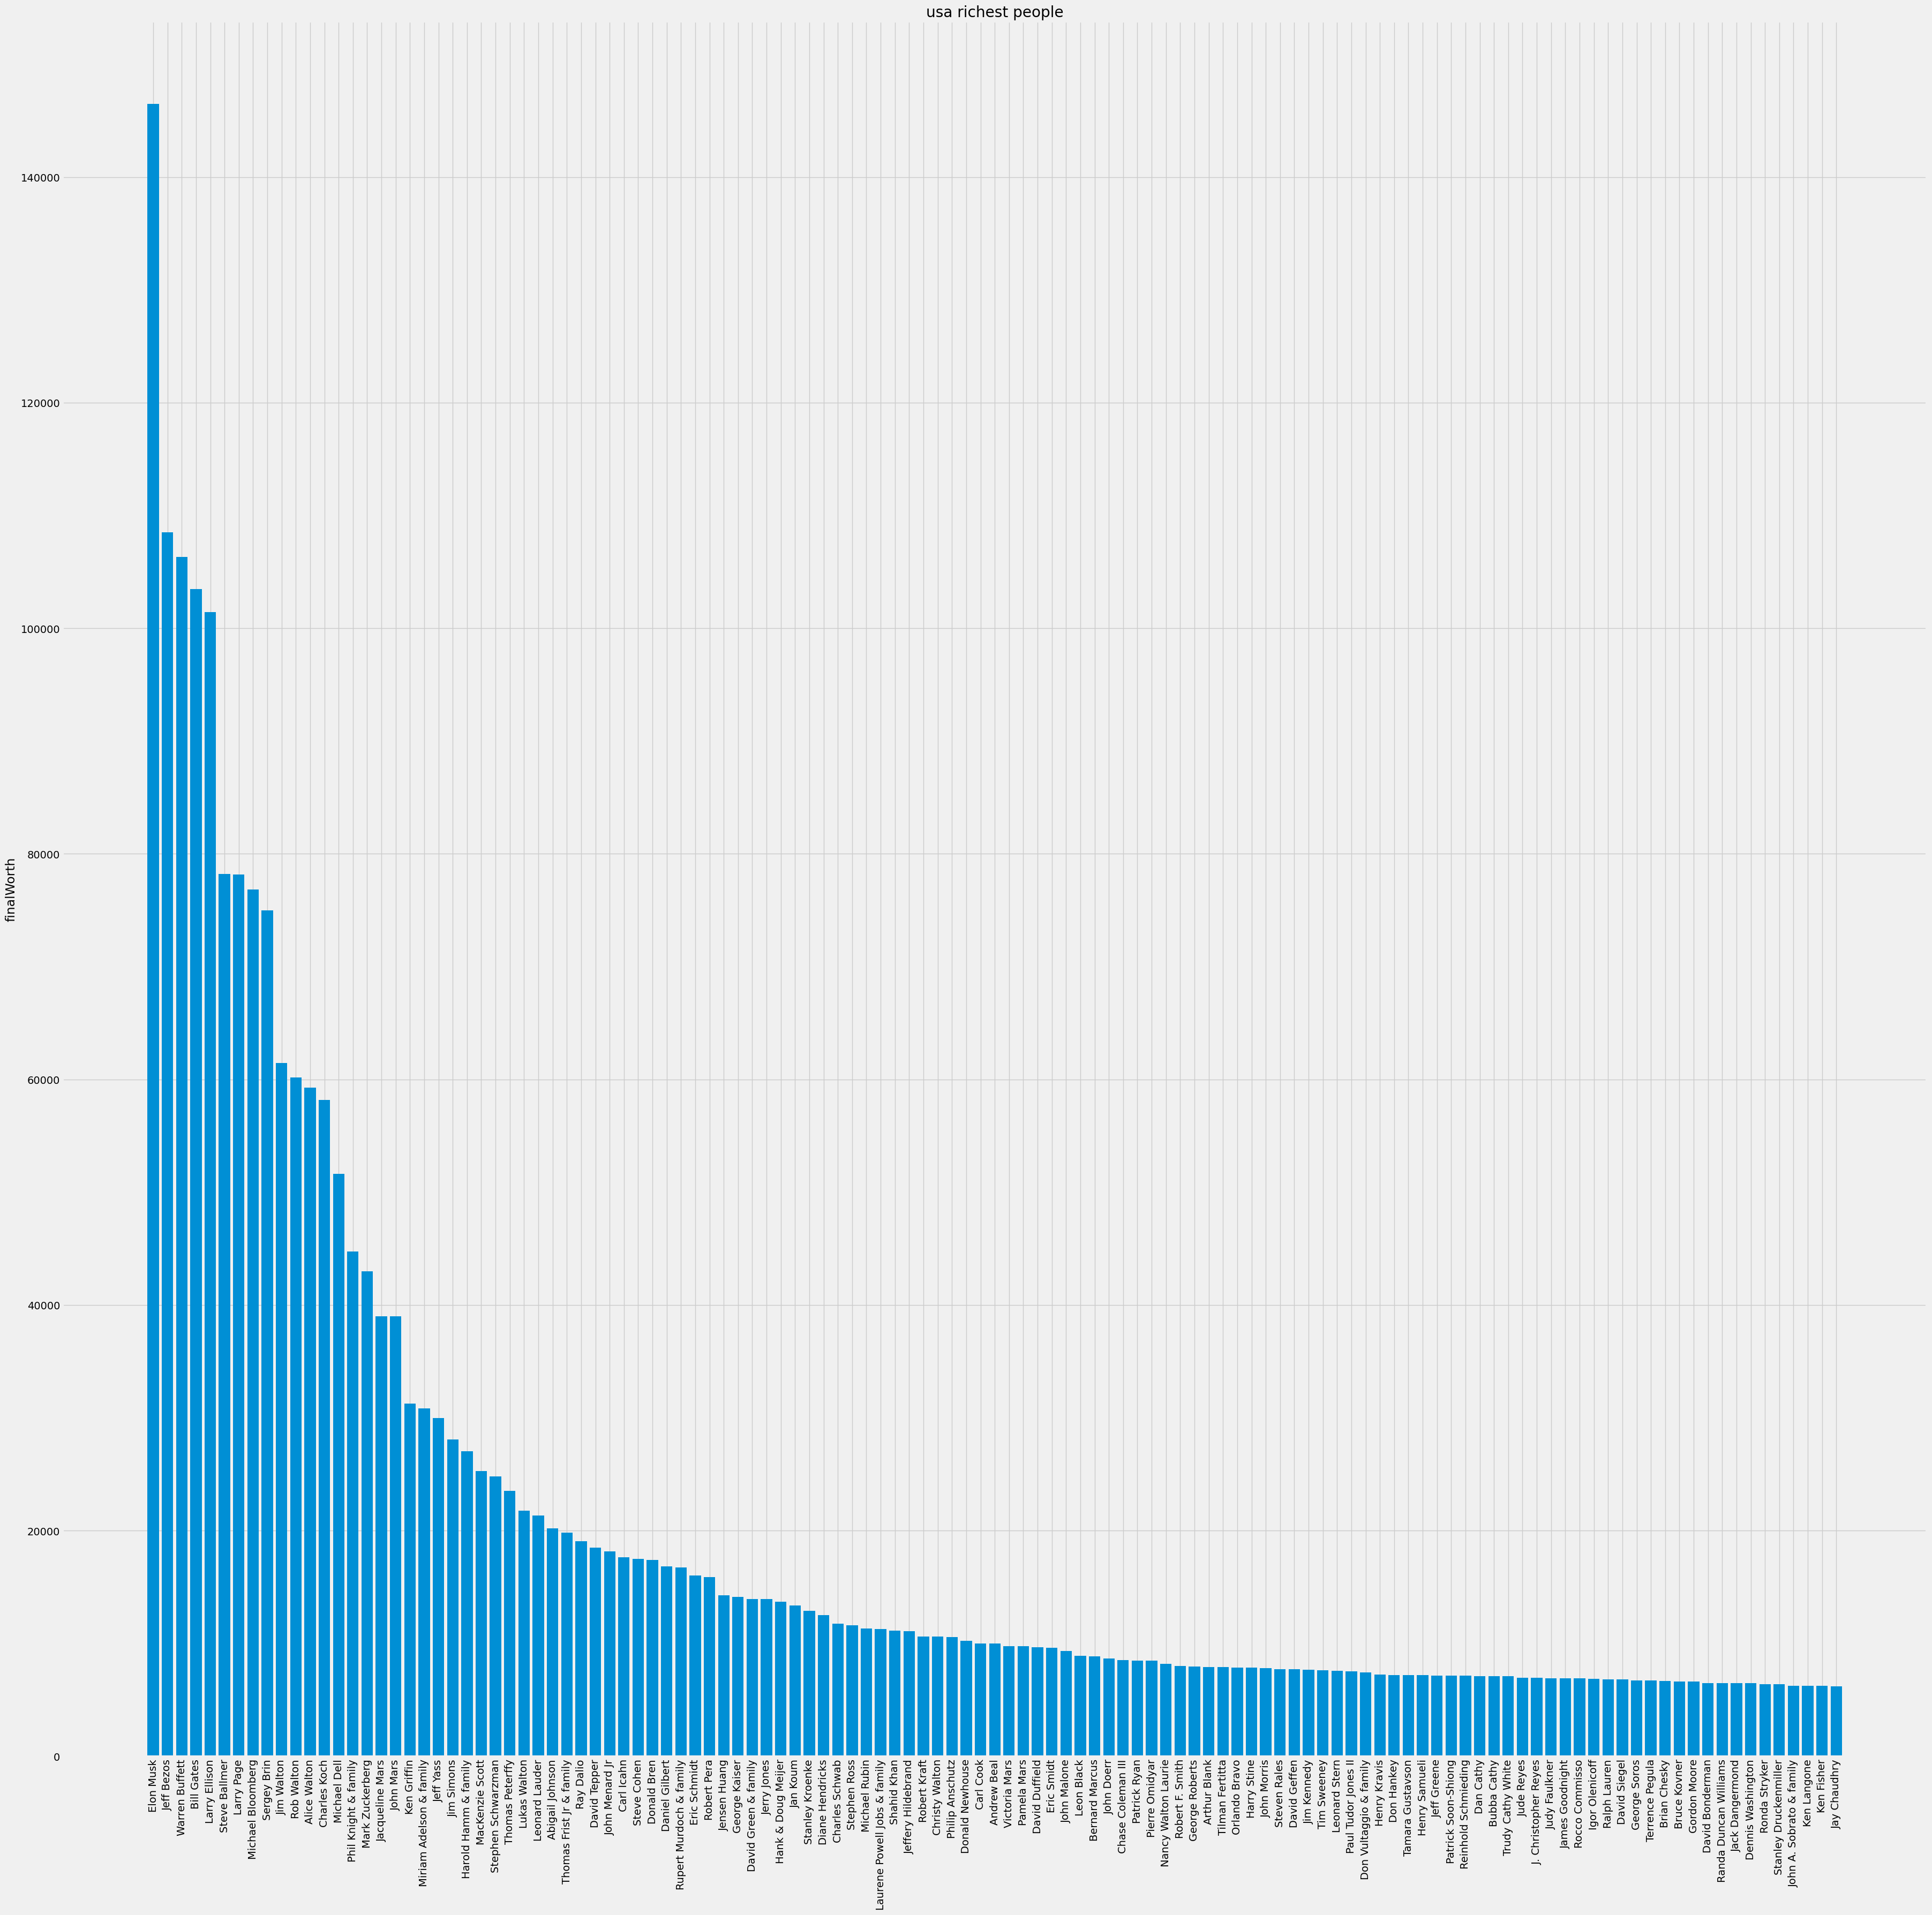

In [ ]:
plt.bar(us['personName'],us['finalWorth'])
plt.title('usa richest people')
plt.ylabel('finalWorth')
plt.gcf().set_size_inches(40,40)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.head()

,bio,rank,finalWorth,personName,city,source,countryOfCitizenship,gender,lastName,estWorthPrev,privateAssetsWorth,archivedWorth,abouts,state,industries
1,Elon Musk cofounded six companies including el...,2,146499.989,Elon Musk,Austin,"Tesla, SpaceX",United States,MMM,Musk,146499.988880,74761.496690,219000.0,"[""Musk, who says he's worried about population...",Texas,Automotive
3,Jeff Bezos founded e-commerce giant Amazon in ...,4,108524.509,Jeff Bezos,Medina,Amazon,United States,MMM,Bezos,108524.508500,23902.460000,171000.0,"[""Growing up, Jeff Bezos worked summers on his...",Washington,Technology
4,"Known as the ""Oracle of Omaha,"" Warren Buffett...",5,106348.208,Warren Buffett,Omaha,Berkshire Hathaway,United States,MMM,Buffett,106348.207791,934.000000,118000.0,"['Buffett still lives in the same Omaha, Nebra...",Nebraska,Finance & Investments
5,Bill Gates turned his fortune from software fi...,6,103477.224,Bill Gates,Medina,Microsoft,United States,MMM,Gates,103477.224212,38320.000000,129000.0,"['When Gates was a kid, he spent so much time ...",Washington,Technology
6,"Larry Ellison is chairman, chief technology of...",7,101436.367,Larry Ellison,Lanai,Oracle,United States,MMM,Ellison,101436.367238,9092.144168,106000.0,['Ellison never finished college. He started o...,Hawaii,Technology


In [ ]:
tech=data[data.industries=='Technology']

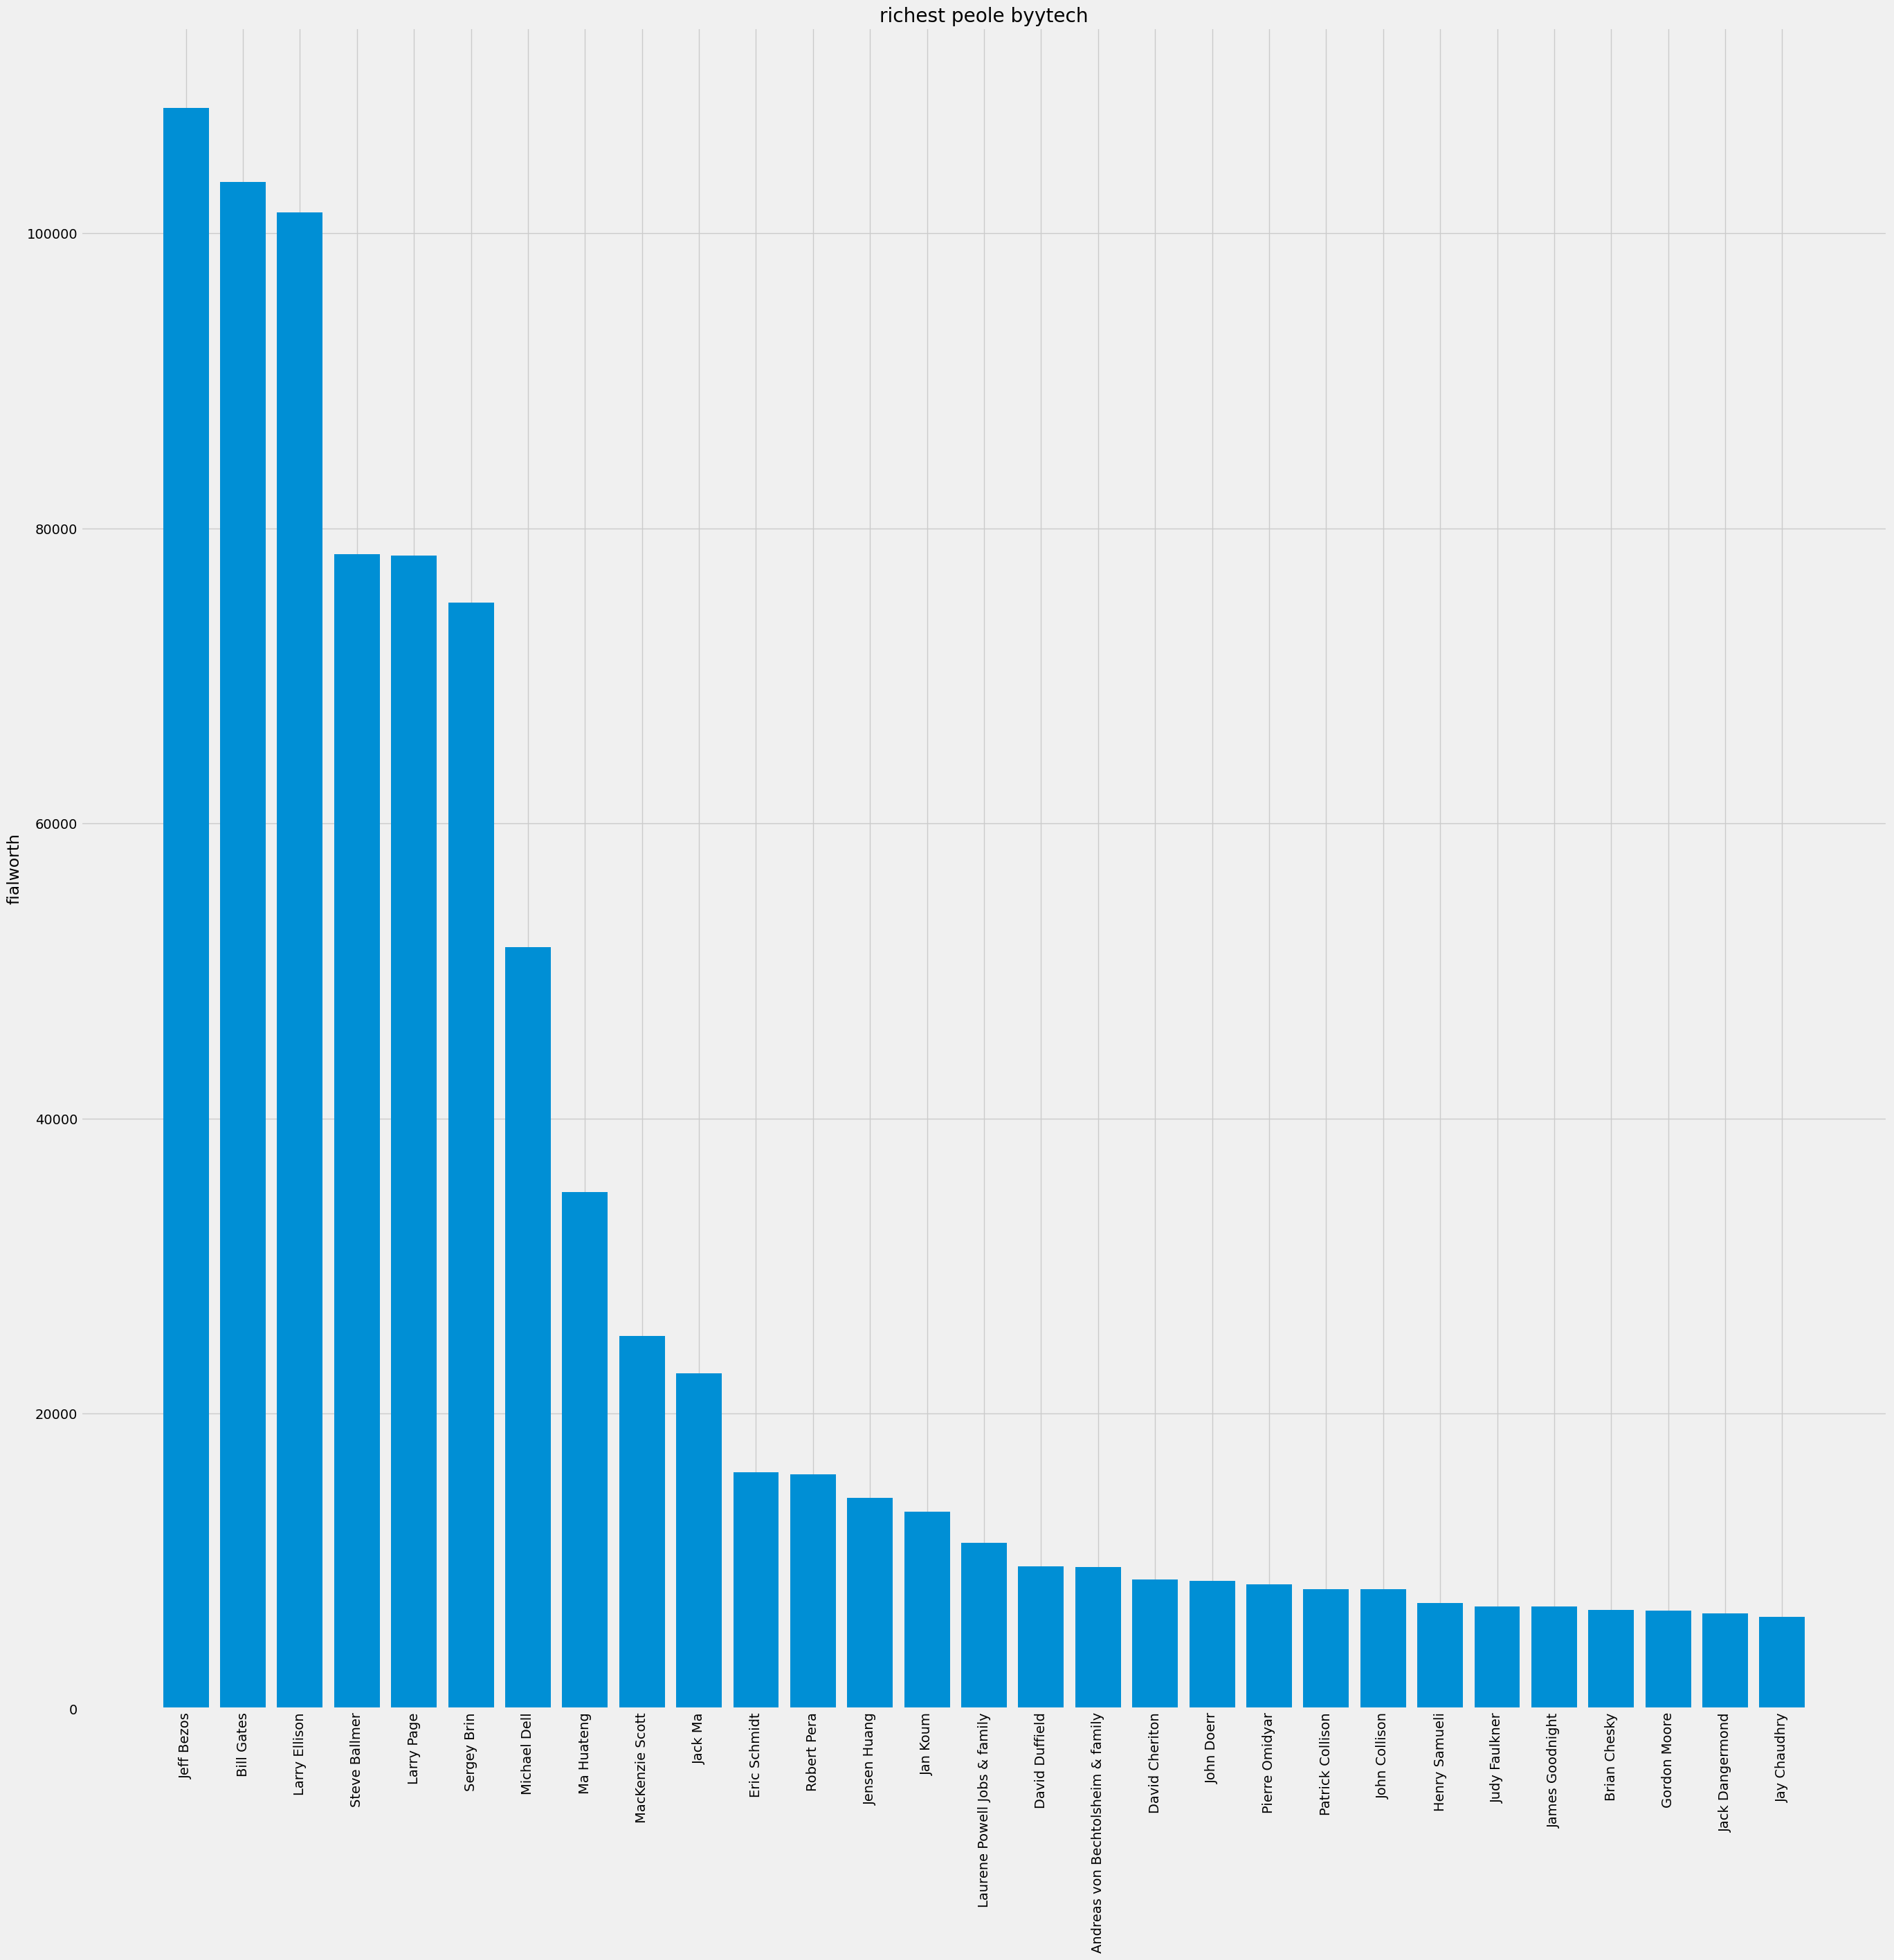

In [ ]:
plt.bar(tech['personName'],tech['finalWorth'])
plt.title('richest peole byytech')
plt.ylabel('fialworth')
plt.gcf().set_size_inches(30,30)
plt.xticks(rotation=90)
plt.show()

In [ ]:
display(data['countryOfCitizenship'].value_counts().head(10))

,count
countryOfCitizenship,
United States,119
China,7
France,2
Canada,2
Ireland,2
Hong Kong,1
Germany,1
Israel,1
